In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from PIL import Image
from collections import Counter

In [13]:
def pixel_hash_distribution(pixel_grid, hash_function):
    dist = []
    rows, cols, dims = pixel_grid.shape

    for r in range(rows):
        for c in range(cols):
            dist.append(hash_function(pixel_grid[r][c]))

    print(Counter(dist))
    
    plt.hist(dist, color='blue', edgecolor='black', bins=np.arange(64))
    plt.show()

In [5]:
HASH_SIZE = 64

def mult_hash(pixel):
  return (pixel[0] * 3 + pixel[1] * 5 + pixel[2] * 7 + pixel[3] * 11) % HASH_SIZE

def xor_hash(pixel):
  return (pixel[0] ^ pixel[1] ^ pixel[2] ^ pixel[3]) % HASH_SIZE

def flat_pixel(pixel):
  return pixel[0] + (pixel[1] << 8)+ (pixel[2] << 16) + (pixel[3] << 24)

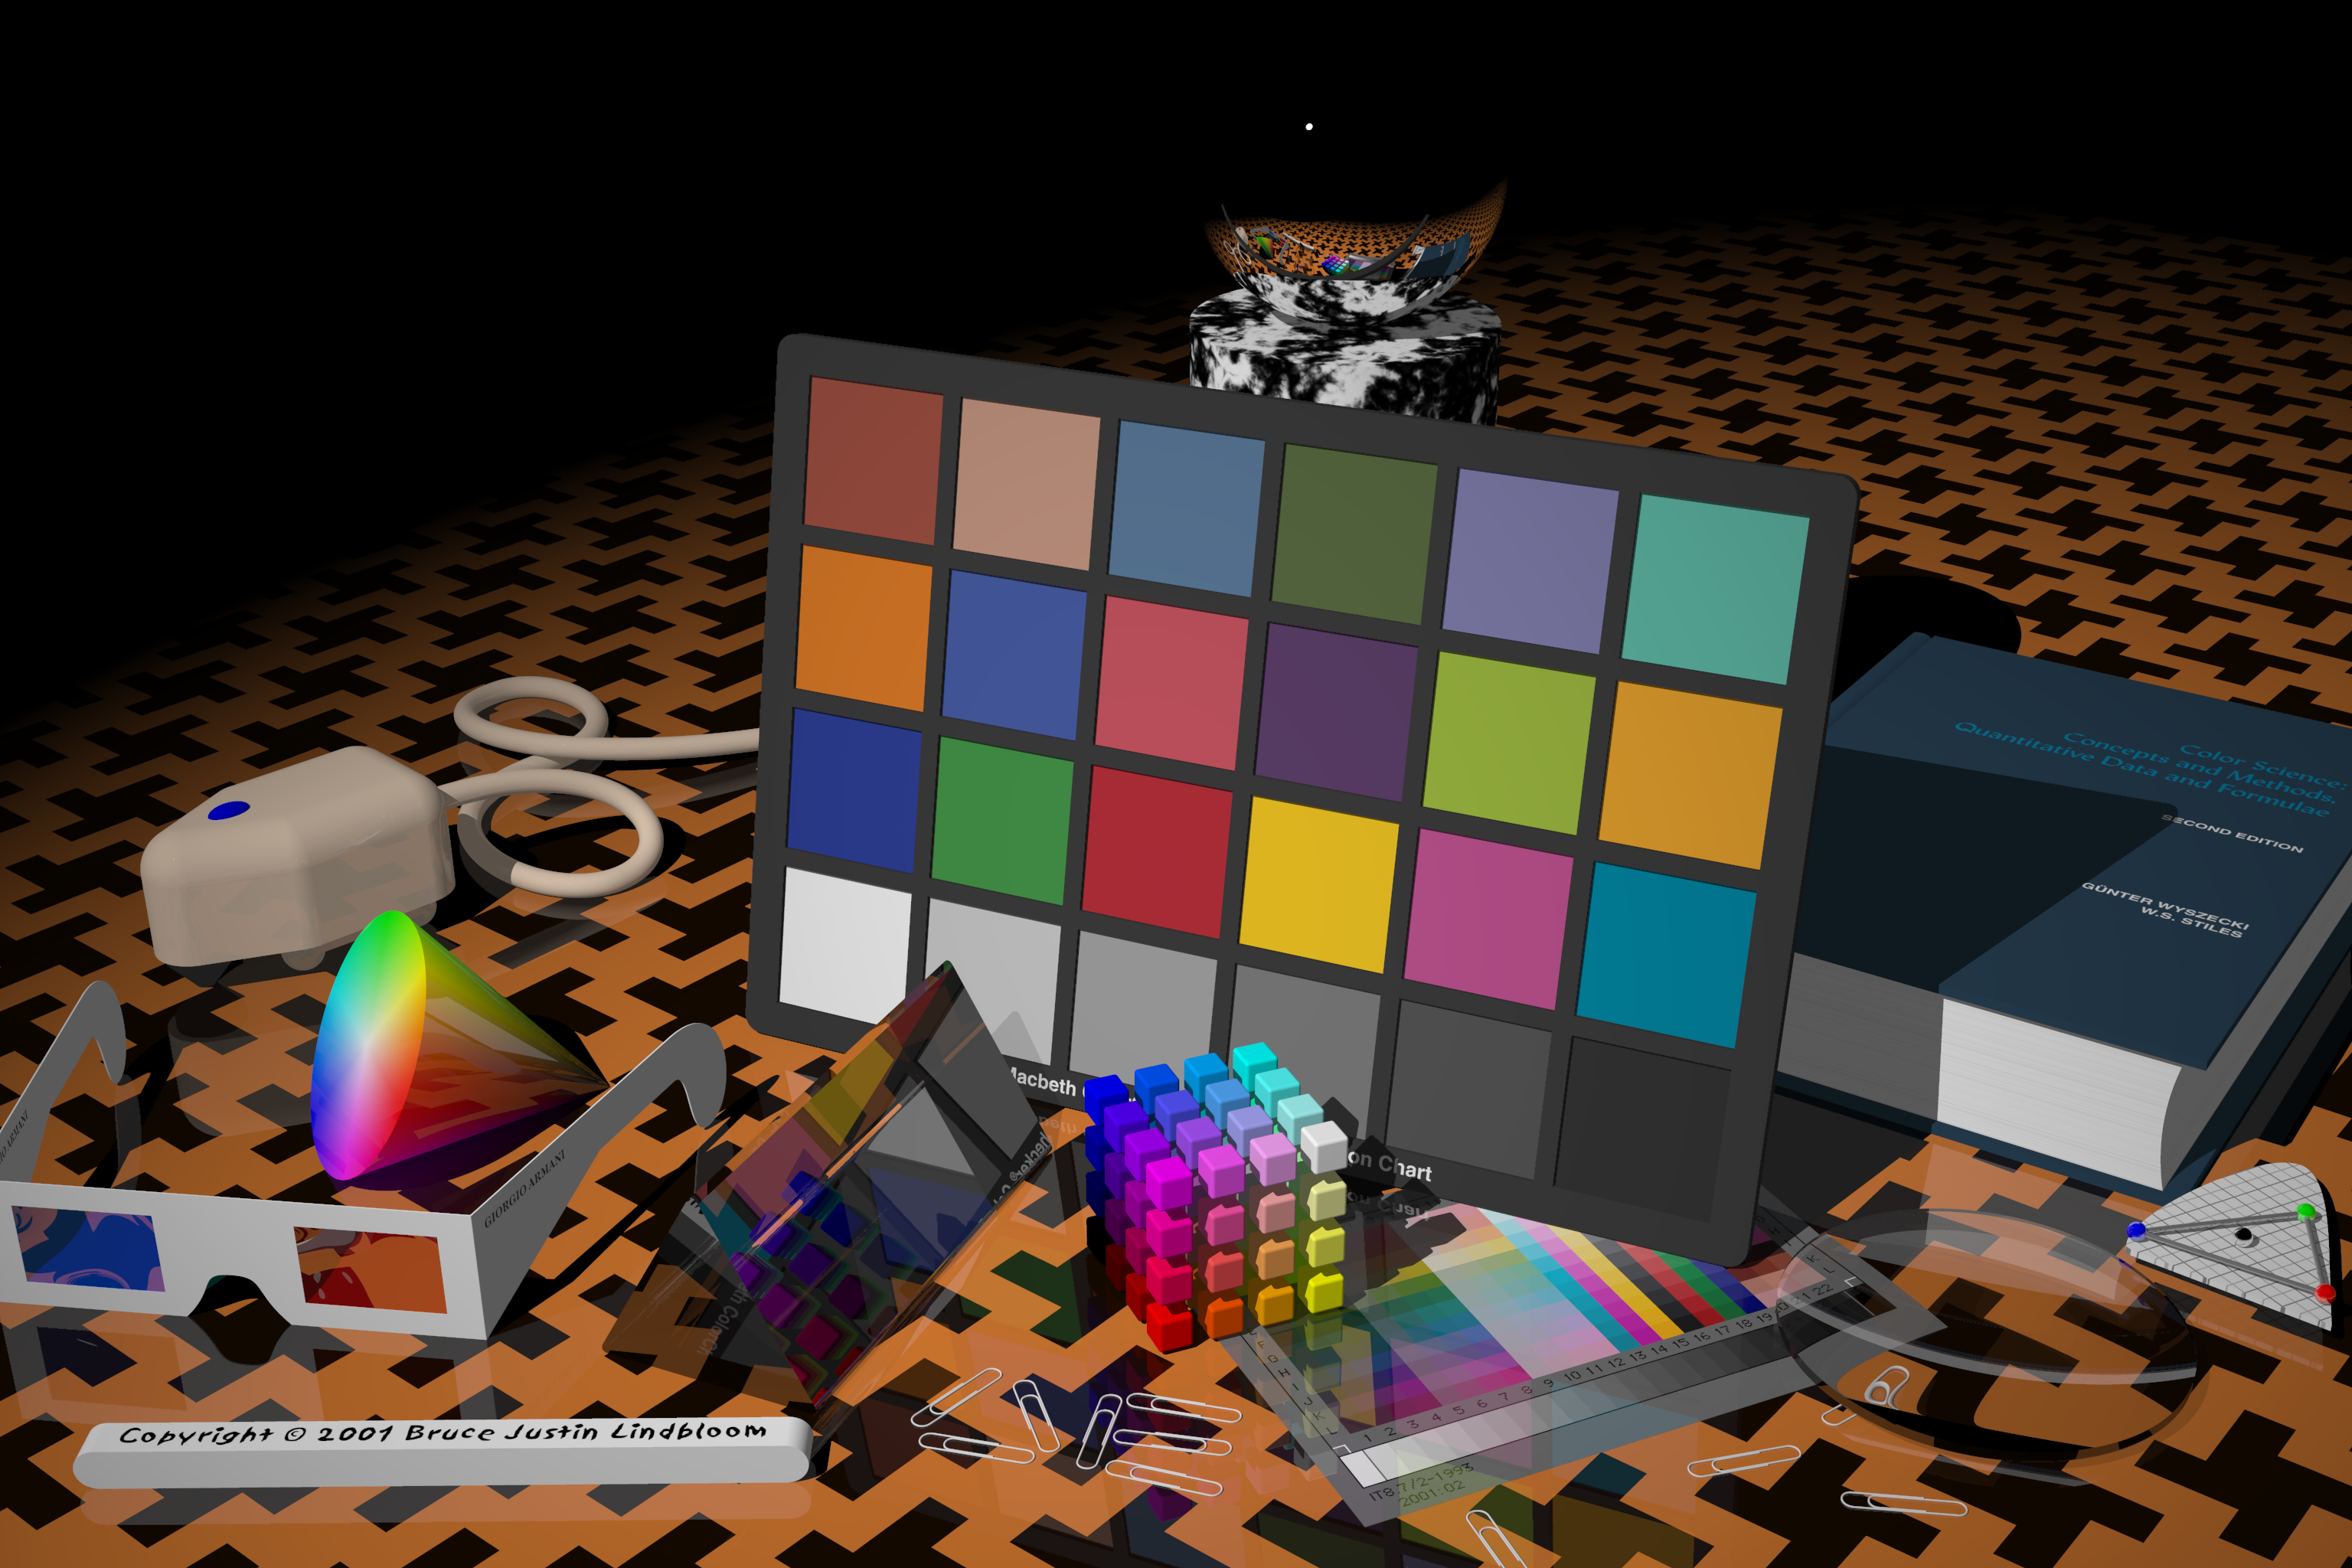

In [18]:
im = Image.open('dataset/imgbench/artificial.png')
pix = np.array(im)

display(im)

Counter({53: 1507249, 16: 166933, 63: 163466, 5: 148312, 31: 146499, 46: 145903, 44: 119444, 50: 114067, 59: 113723, 61: 107393, 1: 106151, 39: 104928, 33: 104470, 19: 96904, 27: 90416, 56: 87463, 15: 86893, 25: 85288, 36: 84185, 47: 82345, 0: 79000, 14: 78833, 54: 77219, 41: 75486, 30: 75370, 52: 75120, 4: 75036, 8: 73181, 22: 72878, 58: 72132, 26: 71943, 34: 70237, 35: 67998, 20: 66371, 37: 66185, 3: 65749, 6: 65209, 29: 64187, 12: 60671, 7: 60375, 11: 59729, 24: 58280, 42: 58231, 62: 57417, 48: 56319, 49: 56201, 55: 55816, 38: 52119, 32: 51701, 23: 51014, 43: 50755, 57: 49487, 2: 49237, 60: 49166, 28: 48642, 9: 48547, 40: 48225, 45: 47548, 10: 47014, 18: 46641, 13: 46452, 17: 43079, 21: 42857, 51: 41767})


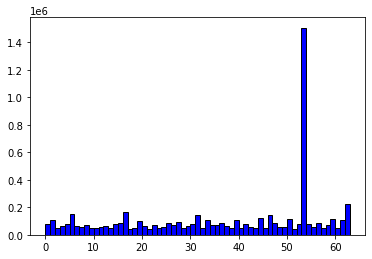

In [17]:
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)
  
# base = np.arange(255)
# prod = cartesian_product(base, base, base, np.arange(1))
# pixel_hash_distribution(np.array([prod]), mult_hash)

pixel_hash_distribution(pix, mult_hash)